### Stage 1: Dataset Selection and Exploration

#### 1.1 Dataset Description

Pada proyek UAS kali ini, saya memilih dataset Predict Restaurant Menu Items Profitabillity yang diambil dari Kaggle (https://bit.ly/41vt9bT). Dataset ini berisi informasi menu restoran yang meliputi:
•	RestaurantID : Kode unik untuk tiap restoran
•	MenuCategory : Kategori menu (e.g. Beverages, Appetizers, Main Course, Desserts)
•	MenuItem : Nama menu makanan/minuman
•	Ingredients : Daftar bahan utama menu
•	Price : Harga menu (dalam USD)
•	Profiitabillity : Kelas profitabilitas menu (Low, Medium, High)

Alasan pemilihan dataset:
(1)	Memiliki target variabel yang jelas
(2)	Data relatif bersih dan siap diolah
(3)	Kombinasi fitur numerik dan kategorikan serta ukuran dataset yang pas

* Penjelasan lebih rinci ada pada laporan



##### Import Libraries & Dataset

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Import Dataset
df = pd.read_csv("restaurant_menu_optimization_data.csv")

#### 1.2 Exploratory Data Analysis (EDA)

In [7]:
# Exploratory Data Analysis (EDA) 
# Display first few rows
df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


##### Melihat ukuran dan struktur data

In [8]:
# Explore dataset shape and columns
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset shape: (1000, 6)
Columns: ['RestaurantID', 'MenuCategory', 'MenuItem', 'Ingredients', 'Price', 'Profitability']


##### Melihat statistik deskriptif variabel numerik

In [9]:
# Explore statistics of the dataset
print("Statistical summary of the dataset:")
print(df.describe())

Statistical summary of the dataset:
            Price
count  1000.00000
mean     12.81801
std       7.41713
min       2.01000
25%       4.86750
50%      12.53500
75%      17.69000
max      29.84000


Analisis pada variabel Price menampilkan:
•	Rata-rata harga menu: USD 12.82
•	Harga terendah: USD 2.01
•	Harga tertinggi: USD 229.84

##### Cek missing values (nilai kosong)

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


Tidak ditemukan adanya nilai hilang atau kosong pada seluruh kolom, sehingga tidak diperlukan imputasi data.

##### Cek Duplikasi Data

In [11]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)
print("Number of duplicate rows:", df.duplicated().sum())

    RestaurantID MenuCategory               MenuItem  \
108         R001    Beverages                   Soda   
185         R001    Beverages                   Soda   
244         R002    Beverages               Iced Tea   
261         R002    Beverages               Iced Tea   
304         R001     Desserts    Chocolate Lava Cake   
363         R001    Beverages                   Soda   
404         R002   Appetizers             Bruschetta   
437         R002   Appetizers             Bruschetta   
498         R002  Main Course          Shrimp Scampi   
577         R003    Beverages               Iced Tea   
580         R002     Desserts               Tiramisu   
583         R001  Main Course        Chicken Alfredo   
635         R001    Beverages                 Coffee   
637         R001    Beverages               Lemonade   
646         R001   Appetizers  Spinach Artichoke Dip   
659         R001    Beverages                 Coffee   
765         R001   Appetizers          Caprese S

Ditemukan 27 baris data duplikat yang kemudian dihapus menggunakan fungsi drop_duplicates(), sehingga jumlah data berkurang menjadi 973 baris

##### Menghapus nilai duplikat

In [12]:
# Hapus baris yang persis sama di semua kolom
df = df.drop_duplicates()

print("Jumlah baris setelah drop_duplicates():", df.shape[0])

Jumlah baris setelah drop_duplicates(): 973


##### Visualisasi Dataset

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8020\4049395250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Profitability', palette='Set2', ax=axes[0, 0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8020\4049395250.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Profitability', y='Price', palette='Set3', ax=axes[1, 0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8020\4049395250.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='MenuCategory', palette='muted', ax=axes[1, 1])
C:\Users\Leno

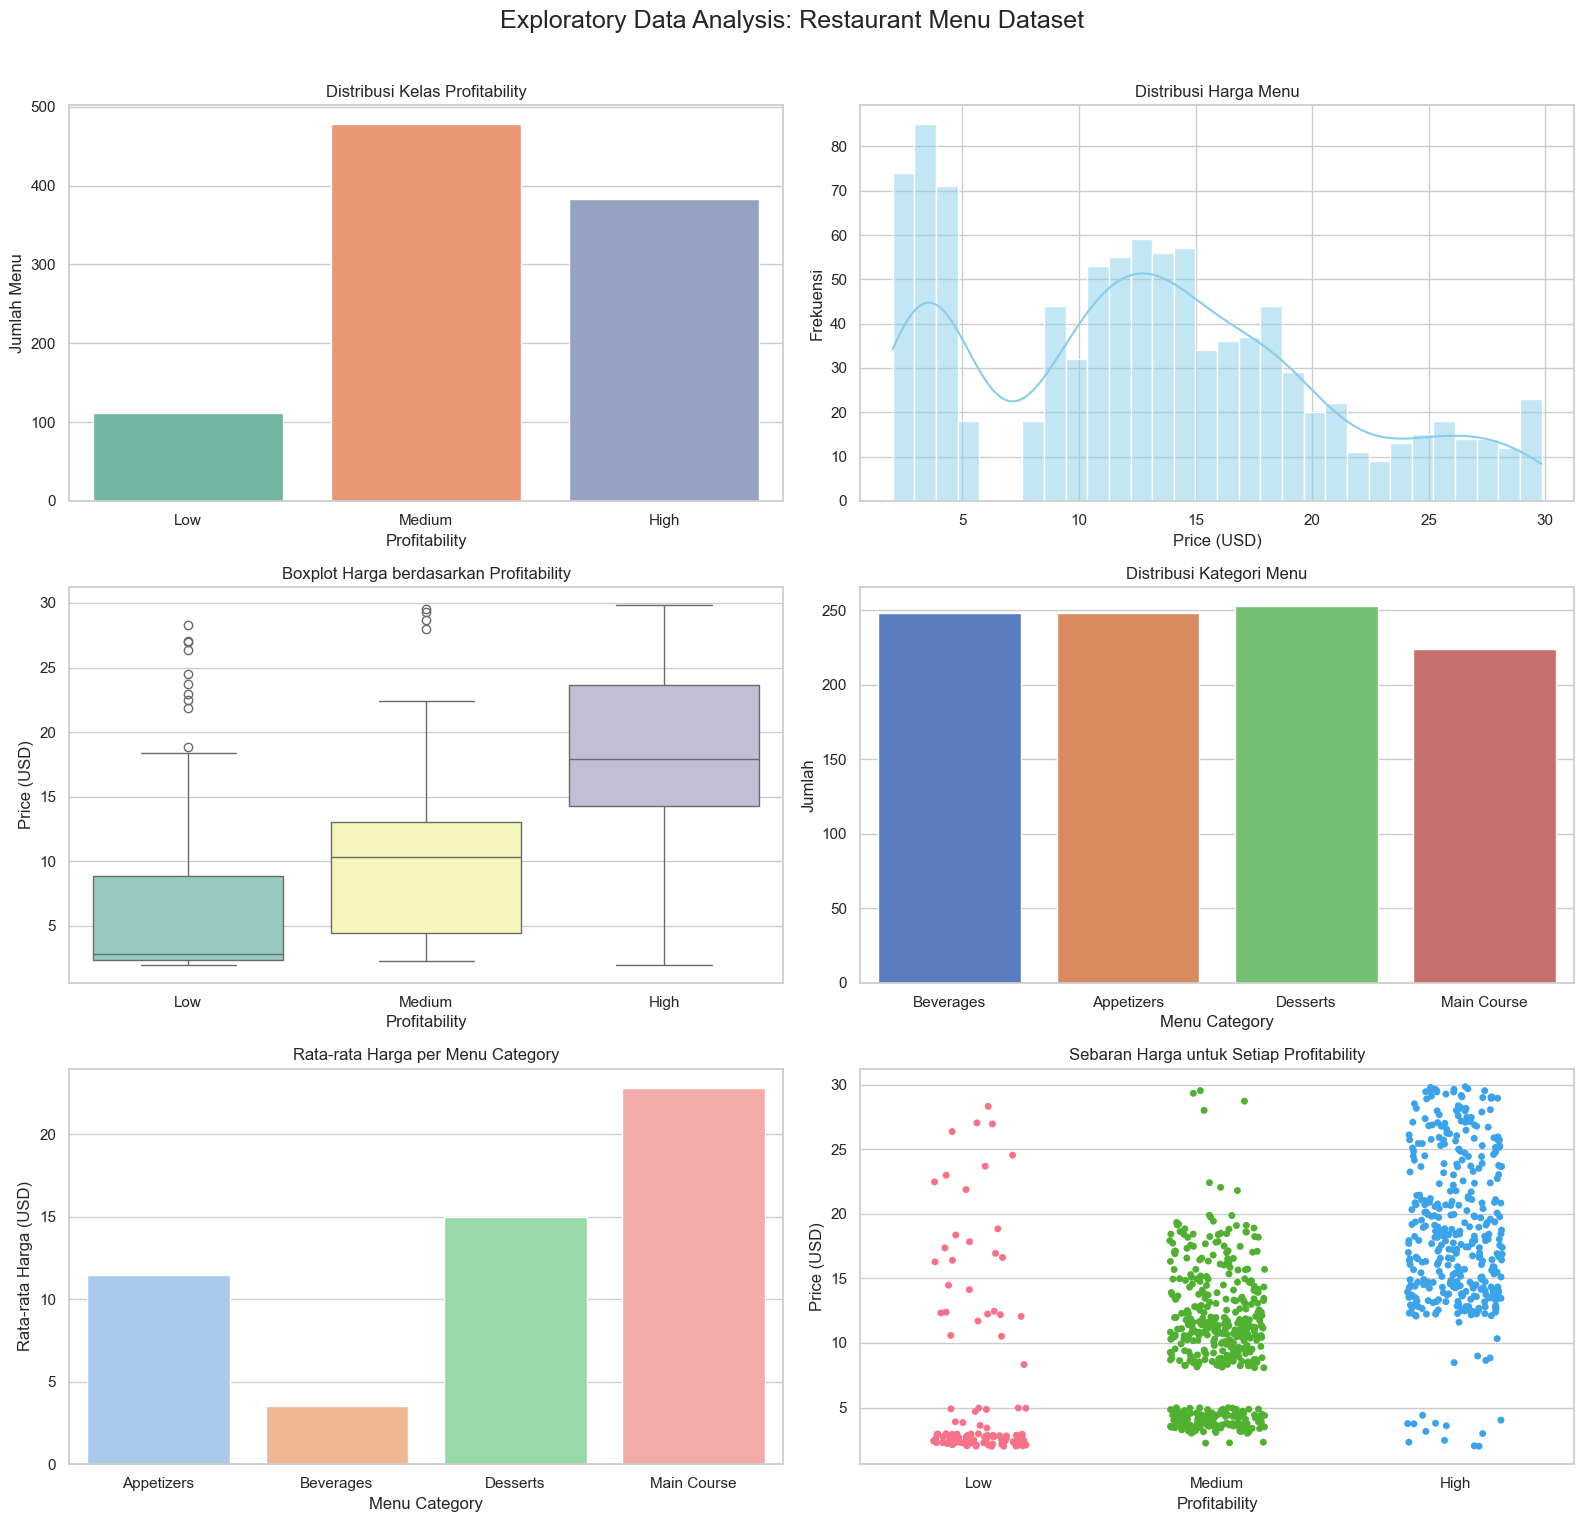

In [13]:
# Visualize the dataset
# Set style
sns.set(style="whitegrid")

# Buat figure dengan 3 baris x 2 kolom visualisasi
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
fig.suptitle("Exploratory Data Analysis: Restaurant Menu Dataset", fontsize=18)

# 1. Countplot Profitability
sns.countplot(data=df, x='Profitability', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Kelas Profitability')
axes[0, 0].set_xlabel('Profitability')
axes[0, 0].set_ylabel('Jumlah Menu')

# 2. Histogram Price
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Harga Menu')
axes[0, 1].set_xlabel('Price (USD)')
axes[0, 1].set_ylabel('Frekuensi')

# 3. Boxplot Price vs Profitability
sns.boxplot(data=df, x='Profitability', y='Price', palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot Harga berdasarkan Profitability')
axes[1, 0].set_xlabel('Profitability')
axes[1, 0].set_ylabel('Price (USD)')

# 4. Countplot Menu Category
sns.countplot(data=df, x='MenuCategory', palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Kategori Menu')
axes[1, 1].set_xlabel('Menu Category')
axes[1, 1].set_ylabel('Jumlah')

# 5. Barplot Rata-rata harga per kategori
avg_price = df.groupby('MenuCategory')['Price'].mean().reset_index()
sns.barplot(data=avg_price, x='MenuCategory', y='Price', palette='pastel', ax=axes[2, 0])
axes[2, 0].set_title('Rata-rata Harga per Menu Category')
axes[2, 0].set_xlabel('Menu Category')
axes[2, 0].set_ylabel('Rata-rata Harga (USD)')

# 6. Stripplot Price vs Profitability
sns.stripplot(data=df, x='Profitability', y='Price', jitter=0.2, palette='husl', ax=axes[2, 1])
axes[2, 1].set_title('Sebaran Harga untuk Setiap Profitability')
axes[2, 1].set_xlabel('Profitability')
axes[2, 1].set_ylabel('Price (USD)')

# Rapikan tata letak dan tampilkan
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

Berdasarkan visualisasi yang telah dibuat, dapat diketahui bahwa:

•	Distribusi Kelas Profitabillity

Grafik batang pada kiri atas menunjukkan bahwa mayoritas menu berada pada kategori Medium Profitability, diikuti oleh High Profitability, dan yang paling sedikit adalah Low Profitability. Hal ini mengindikasikan bahwa sebagian besar menu menghasilkan keuntungan sedang, sedangkan menu dengan keuntungan rendah jumlahnya relatif sedikit.

•	Distribusi Harga Menu

Histogram pada kanan atas memperlihatkan bahwa harga menu bervariasi mulai dari sekitar USD 2 hingga USD 30. Distribusi harga terlihat condong ke kanan (right-skewed), dengan sebagian besar menu berada pada rentang harga rendah hingga menengah (sekitar USD 5–20).

•	Boxplot Harga berdasarkan Profitabillity

Boxplot pada kiri tengah menunjukkan perbedaan yang jelas antara harga menu pada tiap tingkat profitabilitas. Menu dengan High Profitability cenderung memiliki median harga yang lebih tinggi dibandingkan Medium dan Low. Selain itu, kategori Low memiliki sebaran harga yang sempit, sedangkan kategori High memiliki variasi harga yang lebih besar.

•	Distribusi Kategori Menu

Grafik batang pada kanan tengah menunjukkan bahwa jumlah menu relatif seimbang pada setiap kategori (Beverages, Appetizers, Desserts, Main Course). Namun, Beverages sedikit lebih banyak dibandingkan kategori lainnya, sementara Main Course lebih sedikit.

•	Rata-rata Harga per Menu Category

Grafik batang pada kiri bawah menunjukkan bahwa Main Course memiliki rata-rata harga tertinggi, diikuti oleh Desserts dan Appetizers, sedangkan Beverages memiliki rata-rata harga terendah. Temuan ini konsisten dengan logika bisnis bahwa menu utama umumnya dijual dengan harga lebih tinggi.

•	Sebaran Harga untuk Setiap Profitabillity

Grafik scatterplot pada kanan bawah memperlihatkan persebaran harga di setiap kelas profitabilitas. Menu dengan High Profitability terkonsentrasi pada rentang harga menengah hingga tinggi, sedangkan Low Profitability terkonsentrasi pada harga rendah. Kategori Medium memiliki sebaran harga yang cukup lebar namun tetap berada di bawah rata-rata kategori High.


#### 1.3 Hipotesis

Berdasarkan hasil eksplorasi data awal dan hasil dari visualisasi, hipotesis yang dikemukakan dalam penelitian ini adalah:

- H0: Tidak terdapat hubungan yang signifikan antara harga menu, kategori menu, dan tingkat profitabilitas
- H1: Terdapat hubungan yang signifikan antara antara harga menu, kategor menu, dan tingkat profitabilitas.

Menu dengan harga lebih tinggi dan/atau kategori tertentu (e.g. Beverages/ Appetizers/Main Course/Desserts) cenderung memiliki tingkat profitabilitas yang lebih tinggi.

Hipotesis ini akan diuji secara tidak langsung melalui proses pemodelan klasifikasi. Model akan menggunakan variabel-variabel yang tersedia, seperti Price, MenuCategory, dan Ingredients, untuk memprediksi Profitability. Kinerja model yang baik dalam memprediksi target variabel akan mendukung hipotesis alternatif, sedangkan kinerja model yang rendah akan mengindikasikan bahwa hubungan antara fitur dan profitabilitas lemah atau tidak signifikan.


### Stage 2: Data Preprocessing
Tujuan: Tahap preprocessing dilakukan untuk menyapkan dataset sebelum digunakan dalam pemodelan.

##### Menyalin dataset untuk preprocessing

In [47]:
# Copy dataset for preprocessing
df_preprocessed = df.copy()

##### Menghapus kolom yang tidak relevan

In [48]:
# Drop colomns that are not needed for analysis
df_preprocessed = df_preprocessed.drop(['RestaurantID', 'MenuItem', 'Ingredients'], axis=1)

Beberapa kolom seperti RestaurantID, MenuItem, dan Ingredients dihapus karena:

•	Tidak berkontribusi langsung pada prediksi Profitability.

•	Dapat menambah kompleksitas model tanpa memberi informasi yang signifikan.


##### Encoding Variabel Kategorik

In [49]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le_cat = LabelEncoder()
df_preprocessed['Profitability'] = le_cat.fit_transform(df_preprocessed['Profitability'])

le_menu = LabelEncoder()
df_preprocessed['MenuCategory'] = le_cat.fit_transform(df_preprocessed['MenuCategory'])

Profitability (target variabel) di-encode menggunakan LabelEncoder sehingga kategori Low, Medium, dan High menjadi nilai integer.

MenuCategory juga di-encode sehingga kategori menu seperti Beverages, Appetizers, Main Course, dan Desserts menjadi kode numerik.

Distribusi kelas setelah encoding:

•	Kelas 2 (Medium Profitability) → 478 data

•	Kelas 0 (High Profitability) → 383 data

•	Kelas 1 (Low Profitability) → 112 data


In [50]:
# Display unique values in Profitability after encoding
print("Unique values in Profitability after encoding:")
print(df['Profitability'].unique())

Unique values in Profitability after encoding:
['Low' 'Medium' 'High']


In [51]:
df_preprocessed

,MenuCategory,Price,Profitability
0,1,2.55,1
1,0,11.12,2
2,2,18.66,0
3,3,29.55,0
4,3,17.73,2
...,...,...,...
995,1,2.16,1
996,0,11.86,2
997,3,20.57,0
998,2,18.80,0


In [52]:
# Make sure there are no missing values in the target column after mapping
print(df_preprocessed['Profitability'].value_counts(dropna=False))

Profitability
2    478
0    383
1    112
Name: count, dtype: int64


##### Normalisasi fitur numerik
Fitur Price dinormalisasi meggunakan StandarScaler agar memiliki rata-rata 0 dan standar deviasi 1. Tujuannya untuk menghindari perbedaan skala anttar fitur yang nantinya dapat mempengaruhi kinerja model

In [20]:
# Normalize numerical features (Min-Max Scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_preprocessed[['Price']] = scaler.fit_transform(df_preprocessed[['Price']])

##### Pisahkan fitur dan target variabel
- Fitur (X) : MenuCategory, Price
- Target (y) : Profitabillity

In [21]:
# Separate features and target variable
X = df_preprocessed.drop(columns=['Profitability'])
y = df_preprocessed['Profitability']

##### Bagi data tarining dan testing
Data dibagi menjadi 80:20 menggunakan train_test_split, 80% data train (data latih) dan 20% data test (data uji).

In [53]:
# Split dataset into training and testing sets
# (using stratify=y because this is the multiclass classification problem, so we want to maintain the proportion of classes)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [54]:
# Check distributin of target in the training and testing sets
# Cek distribusi target di train dan test
print("Distribusi y_train:\n", y_train.value_counts(normalize=True))
print("Distribusi y_test:\n", y_test.value_counts(normalize=True))

Distribusi y_train:
 Profitability
2    0.491003
0    0.393316
1    0.115681
Name: proportion, dtype: float64
Distribusi y_test:
 Profitability
2    0.492308
0    0.394872
1    0.112821
Name: proportion, dtype: float64


- Stratify=y digunakan agar proporsi tiap kelas pada data latih dan data uji tetap sama seperti proporsi di dataset awal.
- random_state=42 digunakan untuk memastikan pembagian data konsisten di setiap eksekusi.

Distribusi target di train dan test set:
- Train: kelas 2 → 49.1%, kelas 0 → 39.3%, kelas 1 → 11.5%
- Test: kelas 2 → 49.2%, kelas 0 → 39.5%, kelas 1 → 11.3%

##### Menampilkan statistik deskriptif hasil preprocessing

In [55]:
print(X_train.describe())
print(df_preprocessed['MenuCategory'].unique())

       MenuCategory       Price
count    778.000000  778.000000
mean       1.447301   -0.017277
std        1.102436    0.981480
min        0.000000   -1.480553
25%        0.000000   -1.079197
50%        1.000000   -0.039321
75%        2.000000    0.620146
max        3.000000    2.280300
[1 0 2 3]


Setelah preprocessing, fitur MenuCategory memiliki nilai unik [0, 1, 2, 3], sedangkan fitur Price sudah dalam bentuk terstandarisasi dengan ata-rata mendekati 0 dan standar deviasi mendekati 1.

### Stage 3: Model Training and Comparison
Tujuan: Tahap ini bertujuan untuk melatih beberapa metode klasifikasi pada data hasil preprocessing, kemudian membandingkan kinerjanya.


In [56]:
# Import libraries for model training and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [57]:
def evaluate_model(model, X_test, y_test, model_name=""):
    y_pred = model.predict(X_test)
    
    print(f"\n🔍 {model_name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{model_name} - Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [58]:
# Function to train and evaluate multiple models
def evaluate_model(model, X_test, y_test, model_name=""):
    y_pred = model.predict(X_test)
    
    print(f"\n🔍 {model_name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{model_name} - Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


🔍 Decision Tree - Accuracy: 0.8769
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88        77
           1       0.88      0.68      0.77        22
           2       0.91      0.88      0.89        96

    accuracy                           0.88       195
   macro avg       0.88      0.83      0.85       195
weighted avg       0.88      0.88      0.88       195



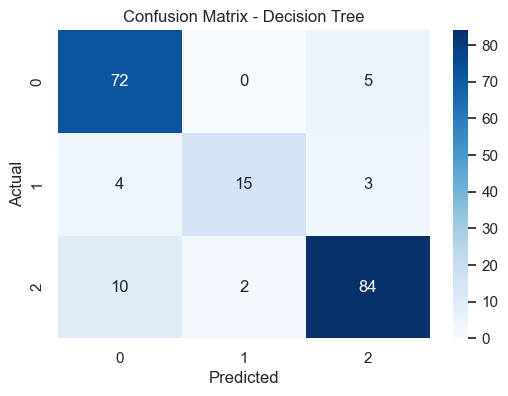

In [59]:
# Inialize and train the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree")
cv_dt = cross_val_score(dt, X_train, y_train, cv=5)


🔍 K-Nearest Neighbors - Accuracy: 0.9179
K-Nearest Neighbors - Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93        77
           1       1.00      0.64      0.78        22
           2       0.93      0.95      0.94        96

    accuracy                           0.92       195
   macro avg       0.94      0.85      0.88       195
weighted avg       0.92      0.92      0.91       195



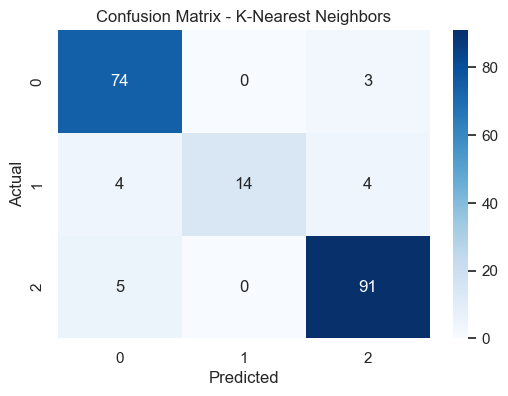

In [60]:
# Initialize and train K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test, "K-Nearest Neighbors")
cv_knn = cross_val_score(knn, X_train, y_train, cv=5)


🔍 Random Forest - Accuracy: 0.8821
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88        77
           1       0.94      0.68      0.79        22
           2       0.91      0.89      0.90        96

    accuracy                           0.88       195
   macro avg       0.90      0.83      0.86       195
weighted avg       0.89      0.88      0.88       195



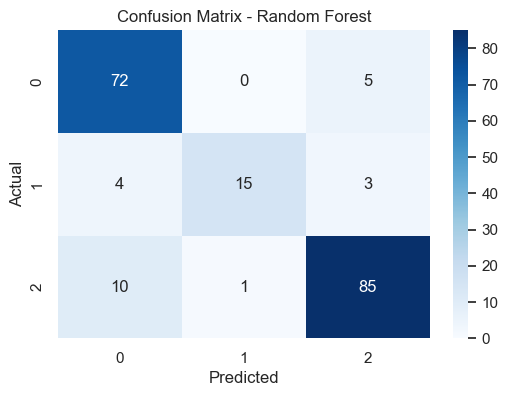

In [61]:
# Inialized and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")
cv_rf = cross_val_score(rf, X_train, y_train, cv=5)


🔍 Support Vector Machine - Accuracy: 0.7692
Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        77
           1       0.34      0.68      0.45        22
           2       0.94      0.64      0.76        96

    accuracy                           0.77       195
   macro avg       0.71      0.76      0.71       195
weighted avg       0.84      0.77      0.78       195



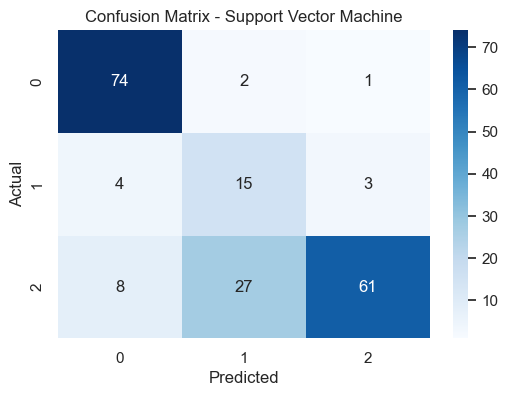

In [36]:
# Inialize and train Support Vector Classifier
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, "Support Vector Machine")
cv_svm = cross_val_score(svm, X_train, y_train, cv=5)

c:\Users\Lenovo\anaconda3\envs\mpml\lib\site-packages\xgboost\training.py:183: UserWarning: [18:52:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Classifier - Accuracy: 0.9077
XGBoost Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        77
           1       1.00      0.64      0.78        22
           2       0.93      0.93      0.93        96

    accuracy                           0.91       195
   macro avg       0.93      0.84      0.87       195
weighted avg       0.91      0.91      0.90       195



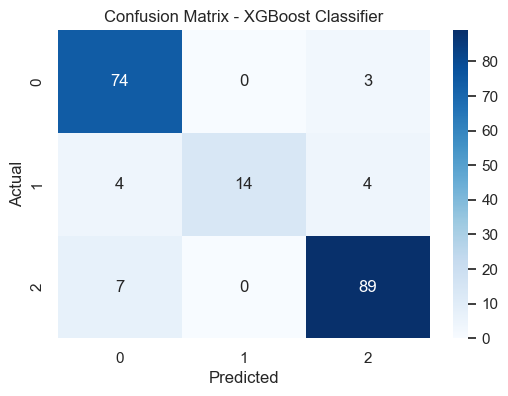

c:\Users\Lenovo\anaconda3\envs\mpml\lib\site-packages\xgboost\training.py:183: UserWarning: [18:52:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Lenovo\anaconda3\envs\mpml\lib\site-packages\xgboost\training.py:183: UserWarning: [18:52:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Lenovo\anaconda3\envs\mpml\lib\site-packages\xgboost\training.py:183: UserWarning: [18:52:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Lenovo\anaconda3\envs\mpml\lib\site-packages\xgboost\training.py:183: UserWarning: [18:52:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_labe

In [62]:
# Inialized and train XGBoost Classifier
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test, "XGBoost Classifier")
cv_xgb = cross_val_score(xgb, X_train, y_train, cv=5)

In [38]:
# Visualize  Comparison pf Accuracy and F1 Score
model_names = ['Decision Tree', 'KNN', 'Random Forest', 'SVM', 'XGBoost']
models = [dt, knn, rf, svm, xgb]

# Test Accuracy & F1-macro
acc_scores = []
f1_macro_scores = []

for model in models:
    y_pred = model.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))
    f1_macro_scores.append(f1_score(y_test, y_pred, average='macro'))

# CV mean accuracy
cv_means = [cv_dt.mean(), cv_knn.mean(), cv_rf.mean(), cv_svm.mean(), cv_xgb.mean()]


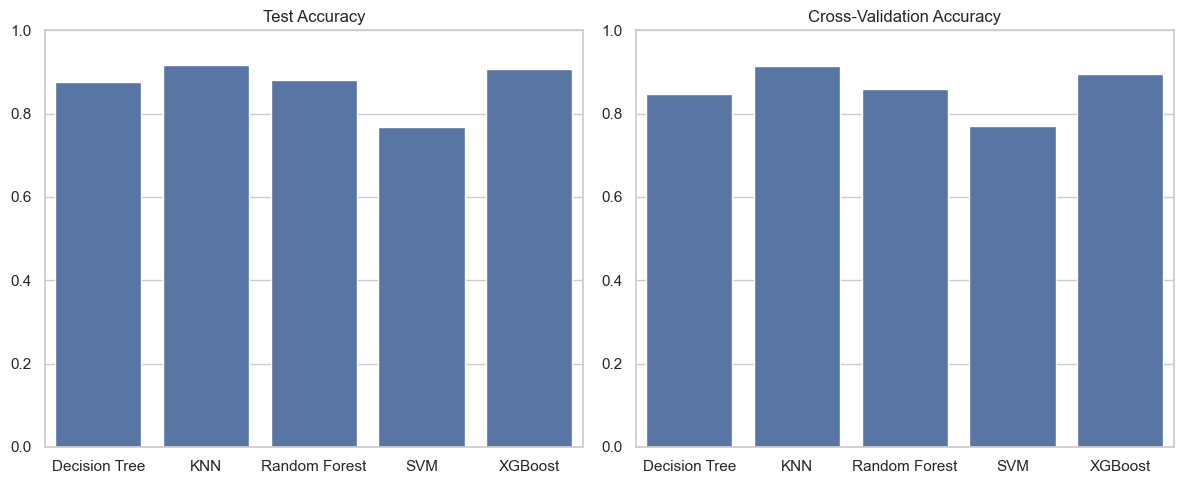

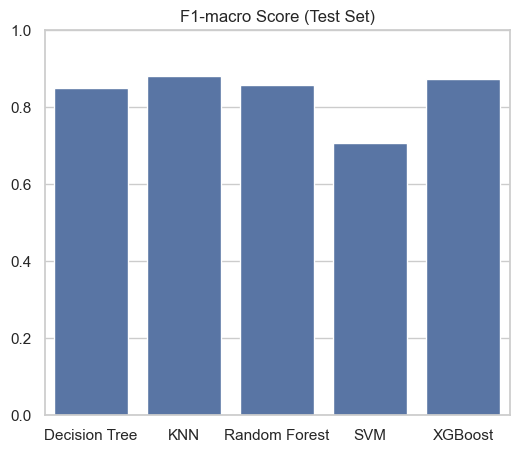

In [63]:
plt.figure(figsize=(12, 5))

# Test Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=acc_scores)
plt.title("Test Accuracy")
plt.ylim(0, 1)

# CV Accuracy
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=cv_means)
plt.title("Cross-Validation Accuracy")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# F1-macro
plt.figure(figsize=(6, 5))
sns.barplot(x=model_names, y=f1_macro_scores)
plt.title("F1-macro Score (Test Set)")
plt.ylim(0, 1)
plt.show()

##### Hyperparameter Tuning

Fitting 5 folds for each of 24 candidates, totalling 120 fits
🔍 Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

🔍 Tuned Decision Tree - Accuracy: 0.9077
Tuned Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        77
           1       1.00      0.64      0.78        22
           2       0.92      0.94      0.93        96

    accuracy                           0.91       195
   macro avg       0.93      0.84      0.87       195
weighted avg       0.91      0.91      0.90       195



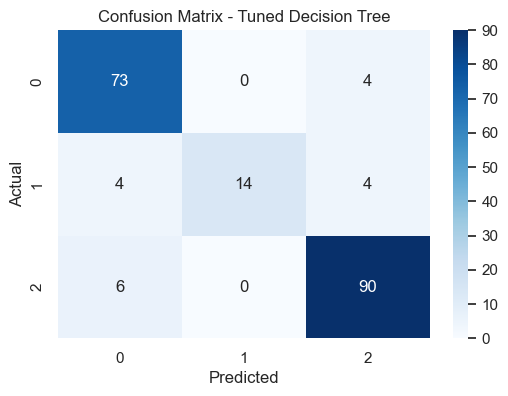

In [64]:
# Hyperparameter Tuning untuk Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definisikan grid hyperparameter yang lebih efisien
param_grid_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Lakukan Grid Search dengan 5-fold cross-validation
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=param_grid_dt,
                       cv=5,
                       scoring='accuracy',
                       verbose=1,
                       n_jobs=-1)

# Latih model ke data pelatihan
grid_dt.fit(X_train, y_train)

# Cetak parameter terbaik
print("🔍 Best parameters for Decision Tree:", grid_dt.best_params_)

# Gunakan model terbaik untuk evaluasi
best_dt = grid_dt.best_estimator_
evaluate_model(best_dt, X_test, y_test, "Tuned Decision Tree")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
🔍 Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}

🔍 Tuned Random Forest - Accuracy: 0.9179
Tuned Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93        77
           1       1.00      0.64      0.78        22
           2       0.93      0.95      0.94        96

    accuracy                           0.92       195
   macro avg       0.94      0.85      0.88       195
weighted avg       0.92      0.92      0.91       195



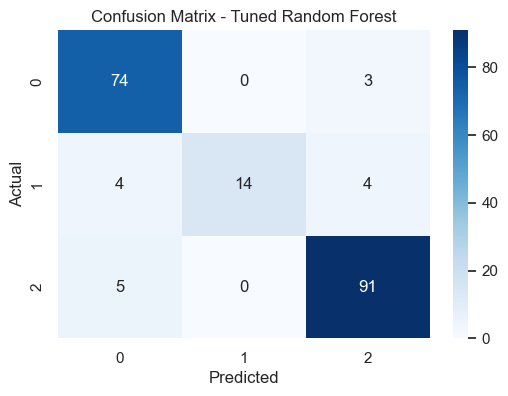

In [65]:
# Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Grid search dengan 5-fold CV
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring='accuracy',
                       verbose=1,
                       n_jobs=-1)

# Fit ke data
grid_rf.fit(X_train, y_train)

# Best params dan model
print("🔍 Best parameters for Random Forest:", grid_rf.best_params_)

# Evaluasi model terbaik
best_rf = grid_rf.best_estimator_
evaluate_model(best_rf, X_test, y_test, "Tuned Random Forest")


In [ ]:
# Hyperparameter Tuning for XGBoost
from xgboost import XGBClassifier

# Definisikan parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Inisialisasi model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Grid search dengan 5-fold CV
grid_xgb = GridSearchCV(estimator=xgb,
                        param_grid=param_grid_xgb,
                        cv=5,
                        scoring='accuracy',
                        verbose=1,
                        n_jobs=-1)

# Fit ke data
grid_xgb.fit(X_train, y_train)

# Best params dan model
print("🔍 Best parameters for XGBoost:", grid_xgb.best_params_)

# Evaluasi model terbaik
best_xgb = grid_xgb.best_estimator_
evaluate_model(best_xgb, X_test, y_test, "Tuned XGBoost")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


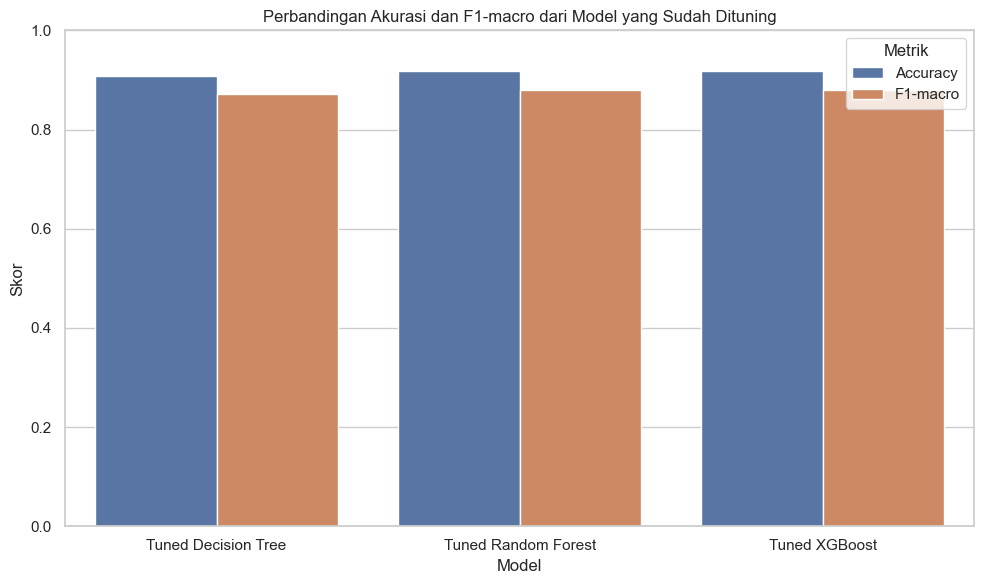

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Daftar model hasil tuning
tuned_models = [best_dt, best_rf, best_xgb]
tuned_names = ['Tuned Decision Tree', 'Tuned Random Forest', 'Tuned XGBoost']

# Simpan metrik dalam list
tuned_acc = []
tuned_f1 = []

# Hitung metrik evaluasi untuk masing-masing model
for model in tuned_models:
    y_pred = model.predict(X_test)
    tuned_acc.append(accuracy_score(y_test, y_pred))
    tuned_f1.append(f1_score(y_test, y_pred, average='macro'))

# Buat DataFrame untuk keperluan visualisasi
df_metrics = pd.DataFrame({
    'Model': tuned_names,
    'Accuracy': tuned_acc,
    'F1-macro': tuned_f1
})

# Ubah ke bentuk long format untuk seaborn
df_long = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Model', y='Score', hue='Metric')
plt.title('Perbandingan Akurasi dan F1-macro dari Model yang Sudah Dituning')
plt.ylim(0, 1)
plt.ylabel('Skor')
plt.xlabel('Model')
plt.legend(title='Metrik')
plt.tight_layout()
plt.show()

##### Simpan Hasil Model
Model yang digunakan adalah Random Forest hasil Tuning

In [ ]:
# Save the best model after tuning
import joblib
joblib.dump(best_rf, 'best_random_forest_model.pkl')

['price_scaler.pkl']